# TP1 : Résolution numérique de systèmes d'équations linéaires

## 1. Introduction:

## 1.1. Objectif 
L'objectif de ce TP est de pouvoir programmer les algorithmes de deux méthodes itératives pour la résolution des Systèmes d'Equations Linéaires (SEL). Ces deux méthodes sont la méthode de ***Jacobi*** et la méthode de ***Gauss-Seidel***. On utilisera dans ce TP les bibliothèques ***numpy***  et ***matplotlib***. 


## 1.2. Rappel
### 1.2.1. Méthodes de résolution d'un SEL
 On considère le SEL suivant: $$(S): \left \{
\begin{array}{c}
a_{11}x_1+a_{12}x_2+\ldots+a_{1n}x_n=b_1\\
a_{21}x_1+a_{22}x_2+\ldots+a_{2n}x_n=b_2\\
\vdots\\
a_{n1}x_1+a_{n2}x_2+\ldots+a_{nn}x_n=b_n
\end{array}\right.$$ 

L'écriture matricielle de $(S)$ est donnée par $AX=b$, avec :  

 $$A = \begin{bmatrix}
  a_{11} & a_{12} & a_{13} & \cdots & a_{1n}\\
  a_{21} & a_{22} & a_{23} & \cdots & a_{2n}\\
  a_{31} & a_{32} & a_{33} & \cdots & a_{3n}\\
  \vdots  & \vdots  & \vdots  & \ddots & \vdots \\
  a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}\\
\end{bmatrix},  X = \begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  \vdots \\
  x_{n} \\
\end{bmatrix}, et\;  b= \begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3} \\
  \vdots \\
  b_{n} \\
\end{bmatrix}.$$

Il existe deux catégories de méthodes pour la résolution du système $(S)$ :      

- les méthodes directes : la solution $X$ est exacte, et donnée après un nombre d'opérations algorithmiques fixé en fonction de $n$, la taille de la matrice $A$.  

Exemples : la méthode du pivot de Gauss, la décomposition LU, ...  

- les méthodes itératives (ou indirectes) : la solution $X$ est approchée et elle est un terme d'une suite récurrente de vecteurs. Cette solution est donnée une fois qu'une condition d'arrêt imposée à l'algorithme, est satisfaite. 

Exemples : Jacobi, Gauss-Seidel, ...

**Dans ce TP, on se limitera à implémenter les méthodes itératives de Jacobi et de Gauss-Seidel et on donnera quelques applications sur ces méthodes.**
 

### 1.2.2. Méthodes itératives

Les méthodes itératives pour la résolution d'un SEL consistent à avoir une suite récurrente de vecteurs qui converge vers la solution du SEL.   

### Principe
On suppose que le système linéaire $AX = b$ est de Cramer. Les méthodes itératives se basent sur une décomposition de $A$ sous la forme $A=M-N$ où $M$ est une matrice inversible. Une suite récurrente de solutions $X^{(k)}$, $k\geq 0$, est ensuite génére comme suit :
\begin{cases}
X^{(0)} \in \mathbb R^n \text{ donné}\\
\hspace{8cm} (*)\\
X^{(k+1)}=M^{-1}NX^{(k)}+M^{-1}b.
\end{cases}
 avec $X^{(0)}$ un vecteur initial.

Cette suite converge, sous certaines conditions, vers la solution exacte $X$.

Les méthodes itératives de Jacobi et de Gauss-Seidel pour résoudre $(S) : AX = b$, consistent en premier lieu
à décomposer $A$ sous la forme :
$$A=D-E-F,$$
avec 
- $D$ : matrice diagonale dont les coefficients diagonaux sont ceux de la matrice $A$,
- $E$ : matrice triangulaire inférieure dont les coefficients diagonaux sont nuls,
- $F$ : matrice triangulaire supérieure dont les coefficients diagonaux sont nuls.

Plus précisément, étant donnée une matrice $A=(a_{i,j})\in M_n(\mathbb R)$, 
$$A= \underbrace{\begin{pmatrix}
a_{1,1}& 0 &\cdots &0\\
0&\ddots&\ddots&0 \\
\vdots&\ddots&\ddots &0 \\
0&\cdots& 0& a_{n,n}
\end{pmatrix}}_{D}-  \underbrace{\begin{pmatrix}
0&\cdots&\cdots&0\\
-a_{2,1}&\ddots&& 0 \\
\vdots&\ddots&\ddots &0 \\
-a_{n,1}&\cdots&-a_{n,n-1}&0
\end{pmatrix}}_{E} -  \underbrace{\begin{pmatrix}
0&-a_{1,2}&\cdots& -a_{1,n}\\
\vdots &\ddots&\ddots& \vdots \\
\vdots &&\ddots&-a_{n-1,n} \\
0&\cdots&\cdots&0
\end{pmatrix}}_{F}
$$
Dans $(*)$,
- Pour un choix de $M=D$ et $N=E-F$, on obtient la suite générée par la méthode de ***Jacobi***.  

- Pour un choix de $M=D-E$ et $N=F$, on obtient la suite générée par la méthode de ***Gauss-Seidel***.  

### Convergence 
***Théorème:*** Si la matrice $A$ est à diagonale strictement dominante ***alors*** les méthodes de Jacobi et de Gauss-Seidel convergent quelque soit le choix du vecteur initial  $X^{(0)}$.

### Critère d'arrêt
Soit $A=(a_{i,j})_{1\leq i,j\leq n} \in M_n(\mathbb R)$ avec $a_{ii} \neq 0$ pour tout $i=1,\cdots ,n$. Soit $\varepsilon$ une tolérance donnéee. Parmi les critères d’arrêt pour les méthodes itératives de Jacobi et Gauss-Seidel, on cite
$$||AX^{(k)}-b|| \leq \varepsilon.$$



## 2. Implémentation des méthodes itératives

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2.1. Matrice à diagonale strictement dominante

### Exercice 1:
Ecrire une fonction `matrice_diag_dominante(A)` prenant en entrée $A$, une matrice carrée d'ordre $n$, qui vérifie si cette matrice est à diagonale strictement dominante (etat True) ou non (etat False).

In [5]:
def matrice_diag_dominante(A):
    n=A.shape[0]
    etat=True
    i=0
    while ((i<n) and (etat==True)):
        etat=np.abs(A[i,i])>np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        i+=1
    return etat  

### Application 1: 
Tester la fonction `matrice_diag_dominante()` sur les deux matrices suivantes:
$$A=\begin{pmatrix}
4 & -1 & -1 & 0 \\
-1 & 4 &  0 & -1 \\
-1 & 0 & 4 & -1 \\
0 & -1 & -1 & 4\\
\end{pmatrix}\ \ \ \ \ \ 
B=\begin{pmatrix}
2 & -1 & -1 & 0 \\
-1 & 2 &  0 & -1 \\
-1 & 0 & 2 & -1 \\
0 & -1 & -1 & 2\\
\end{pmatrix}$$

In [6]:
A=5*np.eye(4)-np.ones(4)
[A[0,3],A[1,2],A[2,1],A[3,0]]=np.zeros(4)
print('A =',A)
B=3*np.eye(4)-np.ones(4)
[B[0,3],B[1,2],B[2,1],B[3,0]]=np.zeros(4)
print('B =',B)
print(matrice_diag_dominante(A),matrice_diag_dominante(B))


A = [[ 4. -1. -1.  0.]
 [-1.  4.  0. -1.]
 [-1.  0.  4. -1.]
 [ 0. -1. -1.  4.]]
B = [[ 2. -1. -1.  0.]
 [-1.  2.  0. -1.]
 [-1.  0.  2. -1.]
 [ 0. -1. -1.  2.]]
True False


**Remarque:** Pour déterminer la solution exacte d'un SEL $AX=b$, on peut utiliser la fonction pré-définie ***np.linalg.solve(A,b)***.

## 2.2. Méthode de Jacobi

### Exercice 2:
1. Ecrire une fonction `jacobi(A, b, X0, epsilon)` prénant en entrée A, une matrice carrée d'ordre $n$, un vecteur $b$ le second membre, $X^{(0)}$ une condition initiale et $\epsilon$ une tolérence donnée,  qui renvoie une solution approchée du SEL $AX=b$ par la  méthode de Jacobi.\
On testera au préalable si A est à diagonale strictement dominante, dans le cas contraire, on renverra  𝐴  n'est pas à diagonale strictement dominante.
2. Tester la méthode de Jacobi sur le SEL $(S):~AX=b$, avec $b=\begin{pmatrix}
50 \\
      30 \\
      70 \\
      50\\
    \end{pmatrix}$, $X^{(0)}=\begin{pmatrix}
  1 \\
  1 \\
  1 \\
  1 \\
\end{pmatrix}$ et  $\varepsilon=10^{-6}$. 
3. En utilisant la fonction ***np.linalg.solve(A,b)***, résoudre $(S)$.
4. Interpréter le résultat.

### Question (1) :

Le schéma itératif de la méthode de Jacobi est :
> $A=D-E-F$\
> $M=D$ \
> $N=E+F$\
> Donner un vecteur initial $X^{(0)}$ et un réel $\varepsilon$\
>   Tant que $\|AX^{(k)}-b\|>\varepsilon$ faire
> > $X^{(k+1)}=M^{−1}N X^{(k)}+M^{-1}b$
>
> Fin Tant que 

In [7]:
def jacobi(A, b, X0, epsilon):
    etat=matrice_diag_dominante(A)
    if  etat==False:
        return ('A n\'est pas à diagonale strictement dominante')
    else:
        M=np.diagflat(np.diag(A))
        inv_M=np.linalg.inv(M)
        N=M-A
        B=inv_M.dot(N)
        C=inv_M.dot(b)
        X1=B.dot(X0)+C
        k=0
        while np.linalg.norm(A.dot(X1)-b,1)>epsilon:
            X1=B.dot(X0)+C
            X0=X1
            k+=1
        return X1,k

### Question (2) :

In [8]:
A=5*np.eye(4)-np.ones(4)
[A[0,3],A[1,2],A[2,1],A[3,0]]=np.zeros(4)

b=np.array([[50],[30],[70],[50]])
X0=np.ones((4,1))
epsilon=10**(-6)
print(jacobi(A, b, X0, epsilon))




(array([[24.99999991],
       [19.99999991],
       [29.99999991],
       [24.99999991]]), 28)


### Question (3):

In [9]:
np.linalg.solve(A,b)

array([[25.],
       [20.],
       [30.],
       [25.]])

## 2.3. Méthode de Gauss-Seidel

### Exercice 3:
1. Ecrire une fonction `Gauss_Seidel(A, b, X0, epsilon)` prénant en entrée A, une matrice carrée d'ordre $n$, un vecteur $b$ le second membre, $X^{(0)}$ une condition initiale et $\varepsilon$ une tolérence donnée,  qui renvoie une solution approchée du SEL $AX=b$ par la  méthode de Gauss-Seidel.\
On testera au préalable si A est à diagonale strictement dominante, dans le cas contraire, on renverra  𝐴  n'est pas à diagonale strictement dominante.
2. Tester la méthode de Gauss-Seidel sur le SEL $(S):~AX=b$, avec $A$ la matrice définie plus haut, $X^{(0)}=\begin{pmatrix}
  1 \\
  1 \\
  1 \\
  1 \\
\end{pmatrix}$ et  $\varepsilon=10^{-6}$. Interpréter le résultat.

### Question (1) :


Le schéma itératif de la méthode de Gauss-Seidel est :
>$A=D-E-F$\
> Donner un vecteur initial $X^{(0)}$ et un réel $\varepsilon$\
> $M=D-E$\
> $N=F$\
>   Tant que $\|AX^{(k)}-b\|>\varepsilon$ faire
> > $X^{(k+1)}=M^{−1}N X^{(k)}+M^{-1}b$
>
> Fin Tant que 

In [10]:

def gauss_seidel(A, b, X0, epsilon):
    etat=matrice_diag_dominante(A)
    if  etat==0:
        return ('A n\'est pas à diagonale strictement dominante')
    else:
        M = np.tril(A) 
        N = M-A
        
        invM=np.linalg.inv(M)
        B=invM.dot(N)
        C=invM.dot(b)
        k=0

        while np.linalg.norm(A.dot(X0)-b,1)>epsilon:
            X0=B.dot(X0)+C
            k+=1    
        return X0,k

### Question (2) :

In [16]:
M=np.tril(A)
M

array([[ 4.,  0.,  0.,  0.],
       [-1.,  4.,  0.,  0.],
       [-1.,  0.,  4.,  0.],
       [ 0., -1., -1.,  4.]])

## 2.4. Application:

##### La condition "$A$ est une matrice à diaonale strictement dominante" est-elle nécessaire pour la convergence des méthodes de acobi et de Gauss-Seidel pour la résolution de $AX=b$?
Soient $A_1$, $A_2$ et b les matrices suivantes:
$$A_1=\left(
 \begin{array}{ccc}1&3&0&1\\
1&1&4&-1\\
0&1&3&-1\\
1&2&3&-8
\end{array}\right),\quad  A_2=\left(
 \begin{array}{ccc}1&3&0&1\\
1&7&4&-1\\
0&1&3&-1\\
1&2&3&-8
\end{array}\right)\quad \mbox{et}\quad b=\left(
 \begin{array}{ccc}1\\
2\\
3\\
4
\end{array}\right).
$$

1- Vérifier que chacun des systèmes d'équations linéaires $(S_1): A_1X=b$ et $(S_2): A_2X=b$ admet une unique solution dans $\mathbb{R}^4$, puis utiliser la fonction **np.linalg.solve(A,b)** pour résoudre $(S_1)$ et $(S_2)$. 

2- Vérifier, en utilisant la fonction **matrice_diag_dominante(A)**, que $A_1$ et $A_2$ ne sont pas des matrices à diaonale strictement dominante.

3- Ecrire deux fonctions **jacobi_sans_test(A,b,X0,epsilon)** et **gauss_seidel_sans_test(A,b,X0,epsilon)** prenant en entrée les matrices $A$, $b$, le vecteur initial $X0$ et la précision epsilon et retournant, respectivement, une solution approchée de $AX=b$ par la méthode de Jacobi et la méthode de Gauss-Seidel sans tester si $A$ est à diagonale strictement dominante.

4- En utilisant ces deux fonctions, vérifier que les méthodes de Jacobi et de Gauss-Seidel ne sont pas convergentes pour la résolution de $(S_1)$ mais elles sont convergentes pour la résolution de $(S_2)$.

5- Que peut-on conclure?


### Question (1):


In [ ]:
A1=np.array([[1,3,0,1],[1,1,4,-1],[0,1,3,-1],[1,2,3,-8]])
A2=np.array([[1,3,0,1],[1,7,4,-1],[0,1,3,-1],[1,2,3,-8]])
b=np.array([[1],[2],[3],[4]])
print(np.linalg.det(A1))
print(np.linalg.det(A2))
print(np.linalg.solve(A1,b))
print(np.linalg.solve(A2,b))


76.0
-67.99999999999996
[[-1.60526316]
 [ 0.94736842]
 [ 0.60526316]
 [-0.23684211]]
[[ 3.91176471]
 [-1.05882353]
 [ 1.44117647]
 [ 0.26470588]]


### Question (2):

In [ ]:
print(matrice_diag_dominante(A1))
print(matrice_diag_dominante(A2))

False
False


### Question (3):

In [ ]:
def jacobi_sans_test(A, b, X0, epsilon):
    M=np.diagflat(np.diag(A))
    inv_M=np.linalg.inv(M)
    N=M-A
    B=inv_M.dot(N)
    C=inv_M.dot(b)
    X1=B.dot(X0)+C
    k=0
    #while np.linalg.norm(X1-X0,1)>epsilon:
    while np.linalg.norm(A.dot(X1)-b,1)>epsilon:
        X1=B.dot(X0)+C
        X0=X1
        k+=1    
    return X1,k

def gauss_seidel_sans_test(A, b, X0, epsilon):
    M = np.tril(A) 
    N = M-A
    invM=np.linalg.inv(M)
    B=invM.dot(N)
    C=invM.dot(b)
    k=0
    while np.linalg.norm(A.dot(X0)-b,1)>epsilon:
        X0=B.dot(X0)+C
        k+=1    
    return X0,k

### Question (4):

In [ ]:
X0=np.array([[0],[0],[0],[0]])
epsilon=10**(-6)
print(jacobi_sans_test(A1, b, X0, epsilon))
print(gauss_seidel_sans_test(A1, b, X0, epsilon))
print(jacobi_sans_test(A2, b, X0, epsilon))
print(gauss_seidel_sans_test(A2, b, X0, epsilon))

(array([[            -inf],
       [            -inf],
       [-3.80043974e+307],
       [ 4.46741611e+307]]), 896)
(array([[            -inf],
       [             inf],
       [-1.40441562e+308],
       [ 1.69171768e+307]]), 482)
(array([[ 3.91176477],
       [-1.0588235 ],
       [ 1.44117649],
       [ 0.26470586]]), 131)
(array([[ 3.91176383],
       [-1.05882331],
       [ 1.44117634],
       [ 0.26470578]]), 34)


C:\Users\esprit\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2585: RuntimeWarning: overflow encountered in reduce
  ret = add.reduce(abs(x), axis=row_axis).max(axis=col_axis)


### Question (5):

La condition "𝐴 est une matrice à diagonale strictement dominante" n'est pas nécessaire pour la convergence des méthodes de Jacobi et de Gauss-Seidel pour la résolution de 𝐴𝑋=𝑏.

### Exercice 3 : (En asynchrone)
On considère le SEL $(S_n)$ :$AX=b$, avec 
$$A = \begin{bmatrix}
  8 & -1 & -1 & 0 & 0&\cdots & 0\\
  -1 & 8 & -1 & -1 & 0& \cdots & 0\\
  -1 & -1 & 8 & -1 & -1 & \cdots & 0\\
   &   & \ddots  & \ddots & \ddots & &  \\
    &   &   & \ddots & \ddots & \ddots&  \\
     &  &  & -1 & -1 & 8& -1 \\
  0&\cdots&\cdots& 0 & -1 & -1 & 8\\
\end{bmatrix},  X = \begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  \vdots \\
  \vdots \\
  \vdots \\
  x_{n} \\
\end{bmatrix}, \;  b= \begin{bmatrix}
  6 \\
  5 \\
  4 \\
  \vdots \\
  4 \\
  5 \\
  6 \\
\end{bmatrix}, \; et \; n\geq 5.$$

1- Pour $\varepsilon=10^{-6}$, représenter sur un même graphe, le nombre d'itérations effectuées pour atteindre la convergence par les deux méthodes itératives : Jacobi et Gauss-Seidel, en fonction de $n$ la taille de la matrice.  On considère $n\in\{5,10,15,20,25,30\}$.


2- Pour $n=20$, représenter sur un même graphe, le nombre d'itérations effectuées pour atteindre la convergence par les deux méthodes itératives : Jacobi et Gauss-Seidel, en fonction de la précision $\varepsilon$.  On considère $\varepsilon\in\{10^{-3},10^{-6},10^{-9},10^{-12}\}$.

On considère le vecteur nul comme vecteur initial.  

Interpréter les résultats.

In [ ]:
def S_n(n):
    A=8*np.eye(n)+np.diagflat(-np.ones(n-1),1)+np.diagflat(-np.ones(n-2),2)+np.diagflat(-np.ones(n-1),-1)+np.diagflat(-np.ones(n-2),-2)
    b=4*np.ones((n,1))
    [b[0,0], b[-1,0]]=[6,6]
    [b[1,0], b[n-2,0]]=[5,5]
    return A,b

### Question (1):

In [ ]:
epsilon=10**(-6)
N=np.arange(5,31,5)
Iter_J=[]
Iter_GS=[]
for n in N:
    S=S_n(n)
    X0=np.zeros((n,1))
    J=jacobi(S[0],S[1],X0,epsilon)
    GS=gauss_seidel(S[0],S[1],X0,epsilon)
    Iter_J.append(J[1])
    Iter_GS.append(GS[1])  

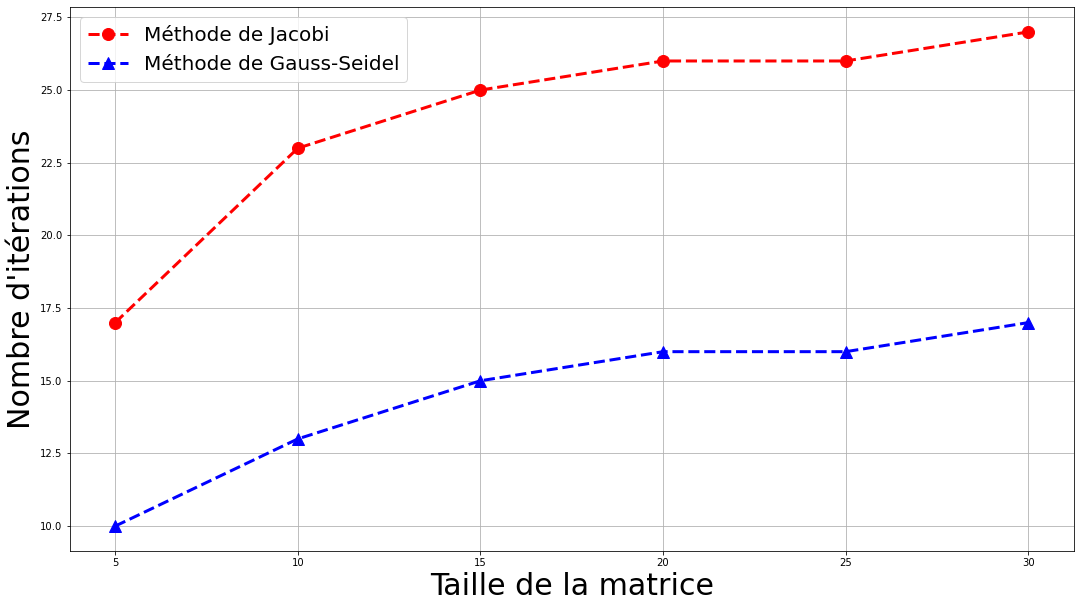

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(N,Iter_J,'ro--',N,Iter_GS,'b^--', linewidth=3,markersize=12) 
plt.xlabel('Taille de la matrice',fontsize=30)
plt.ylabel('Nombre d\'itérations',fontsize=30)
plt.legend(('Méthode de Jacobi','Méthode de Gauss-Seidel'),fontsize=20, loc = 0) 
plt.grid(True)
plt.savefig('Comparaison_n.png',format='png') 

### Question (2):

In [ ]:
n=20
epsilon=[10**-3,10**-6,10**-9,10**-12]
S=S_n(n)
X0=np.zeros((n,1))
Iter_J=[]
Iter_GS=[]
for eps in epsilon:
    J=jacobi(S[0],S[1],X0,eps)
    GS=gauss_seidel(S[0],S[1],X0,eps)
    Iter_J.append(J[1])
    Iter_GS.append(GS[1])  


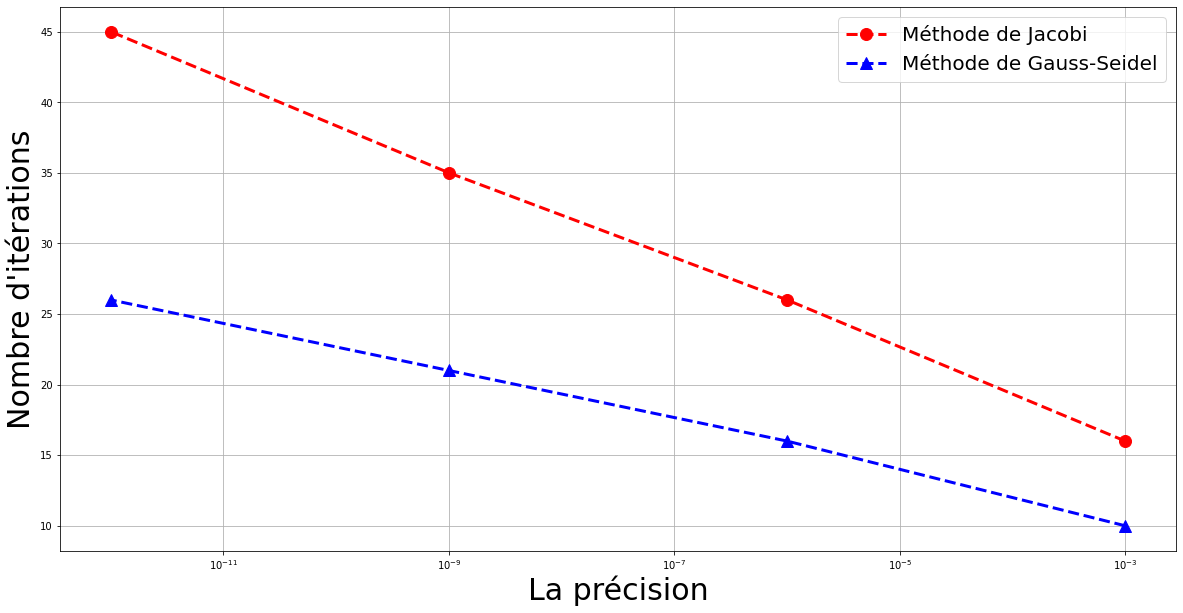

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(epsilon,Iter_J,'ro--',epsilon,Iter_GS,'b^--', linewidth=3,markersize=12) 
plt.xscale('log')
plt.xlabel('La précision',fontsize=30)
plt.ylabel('Nombre d\'itérations',fontsize=30)
plt.legend(('Méthode de Jacobi','Méthode de Gauss-Seidel'),fontsize=20, loc = 0) 
plt.grid(True)
plt.savefig('Comparaison_n.png',format='png') 

##### Références  

[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)

# Compte rendu

Pour $\varepsilon\in]\frac{-1-\sqrt 3}{2},\frac{\sqrt 3-1}{2}[$ et $n\geq 3$ fixés, soit $A_{\varepsilon}$ la matrice symétrique,
de taille $n\times n$, et pentadiagonale de motif $[\varepsilon^2,\varepsilon,1,\varepsilon,\varepsilon^2]$

On considère le SEL $(S_n)$ :$A_{\varepsilon}X=b$, avec 
$$A_{\varepsilon} = \begin{bmatrix}
  1 &  \varepsilon& \varepsilon^2 & 0 & 0&\cdots & 0\\
   \varepsilon& 1 & \varepsilon & \varepsilon^{2} & 0& \cdots & 0\\
  \varepsilon^{2} & \varepsilon & 1 & \varepsilon & \varepsilon^{2} & \cdots & 0\\
   &   & \ddots  & \ddots & \ddots & &  \\
    &   &   & \ddots & \ddots & \ddots&  \\
     &  &  & \varepsilon^2 &  \varepsilon& 1& \varepsilon\\
  0&\cdots&\cdots& 0 & \varepsilon^2 & \varepsilon & 1\\
\end{bmatrix},  X = \begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  \vdots \\
  \vdots \\
  \vdots \\
  x_{n} \\
\end{bmatrix}, \;  b= \begin{bmatrix}
  b_1 \\
  b_2 \\
  b_3 \\
  \vdots \\
  \vdots \\
  \vdots \\
  b_n \\
\end{bmatrix}, \; et \; n\geq 3.$$









1. Pour $\varepsilon =0.2$ et $n=10$. Ecrire la matrice $A_\varepsilon $ .

In [ ]:
n=10
eps=0.2
Aeps=np.eye(n)+np.diagflat(eps*np.ones(n-1),1)+np.diagflat((eps**2)*np.ones(n-2),2)+np.diagflat(eps*np.ones(n-1),-1)+np.diagflat((eps**2)*np.ones(n-2),-2)
print(Aeps) 


[[1.   0.2  0.04 0.   0.   0.   0.   0.   0.   0.  ]
 [0.2  1.   0.2  0.04 0.   0.   0.   0.   0.   0.  ]
 [0.04 0.2  1.   0.2  0.04 0.   0.   0.   0.   0.  ]
 [0.   0.04 0.2  1.   0.2  0.04 0.   0.   0.   0.  ]
 [0.   0.   0.04 0.2  1.   0.2  0.04 0.   0.   0.  ]
 [0.   0.   0.   0.04 0.2  1.   0.2  0.04 0.   0.  ]
 [0.   0.   0.   0.   0.04 0.2  1.   0.2  0.04 0.  ]
 [0.   0.   0.   0.   0.   0.04 0.2  1.   0.2  0.04]
 [0.   0.   0.   0.   0.   0.   0.04 0.2  1.   0.2 ]
 [0.   0.   0.   0.   0.   0.   0.   0.04 0.2  1.  ]]


In [ ]:
Aeps[0,0]

1.0

2. Pour $\varepsilon =0.2$ et $n=10$. Tester si la matrice $A_\varepsilon $ est à diagonale strictement dominante .

In [ ]:
 matrice_diag_dominante(Aeps)

True

3. Ecrire les vecteurs $\hat{x}=(1,1,....,1)\in \mathbb{R}^{n}$ et $b_{\varepsilon}=A_{\varepsilon}\hat{x}$ .

In [ ]:
n=10
xhat=np.ones(n)
print(xhat)
beps=Aeps.dot(xhat)
print(beps)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.24 1.44 1.48 1.48 1.48 1.48 1.48 1.48 1.44 1.24]


4. Ecrire une fonction jacobi1 (A, b, X0, tol,nmax) prénant en entrée A, une matrice carrée d'ordre  𝑛 , un vecteur  𝑏  le second membre,  𝑋(0)  une condition initiale et  𝜖  une tolérence donnée, une borne supérieur nmax sur le nombre d'intération qui renvoie une solution approchée du SEL  𝐴𝑋=𝑏  par la méthode de Jacobi, en utilisant le shéma itératif ci-dessous.

### Rappel méthode de Jacobi

Algorithme de Jacobi (Schéma itératif): Donner un vecteur initial $X^{(0)}$ et un réel $\varepsilon$
>   Tant que $\|AX^{(K)}-b\|>\epsilon$ faire
> >  Pour $i$ de $1$ à $n$ faire
> > >  $$x^{(k+1)}_{i}=\frac{1}{a_{ii}}\big(b_{i}-\underset{j\neq i}{\sum_{j=1}^n}a_{ij}x^{(k)}_{j}\big)$$
> >
> >  Fin pour 
>
> Fin Tant que 

In [ ]:
def jacobi1(A,b,x0,tol,nmax):
    n=A.shape[0]
    iter=0
    r=b-A.dot(x0)
    err=np.linalg.norm(r,1)
    x=x0
    while (err>tol) and (iter<nmax):
        iter=iter+1
        xnew=np.zeros(n)
     
        for i in np.arange(n):
            s=0
            for j in np.arange (n):
                if i!=j:
                    s=s+A[i,j]*x[j]
            xnew[i]=(b[i]-s)/A[i,i]
        x=xnew 
        r=b-A.dot(x)
        err=np.linalg.norm(r,1)
    return x,r,err

    

In [ ]:
x0=np.zeros(n)
tol=10**(-3)
nmax=10**(3)
print(jacobi1(Aeps,beps,x0,tol,nmax))



(array([0.99997084, 0.9999483 , 0.99992908, 0.99991552, 0.99990843,
       0.99990843, 0.99991552, 0.99992908, 0.9999483 , 0.99997084]), array([4.23332873e-05, 7.50973941e-05, 1.02984764e-04, 1.22706360e-04,
       1.32992256e-04, 1.32992256e-04, 1.22706360e-04, 1.02984764e-04,
       7.50973941e-05, 4.23332873e-05]), 0.0009522281234466412)


5- Ecrire une fonction gauss_seidel1(A, b, X0, epsilon) prénant en entrée A, une matrice carrée d'ordre  𝑛 ,
un vecteur  𝑏  le second membre,  𝑋(0)  une condition initiale et  𝜖  une tolérence donnée, qui renvoie une 
solution approchée du SEL  𝐴𝑋=𝑏  par la méthode de Gauss-Seidel, en utilisant le shéma itératif ci-dessous.

Algorithme de Gauss Seidel(Schéma itératif): Donner un vecteur initial $X^{(0)}$ et un réel $\varepsilon$
>   Tant que $\|AX^{(K)}-b\|>\varepsilon$ faire
> > $$x^{(k+1)}_{1}=\frac{1}{a_{11}}\big(b_{1}-\sum_{j=2}^n a_{1j}x^{(k)}_{j}\big)$$
> >  Pour $i$ de $2$ à $n-1$ faire
> > >  $$x^{(k+1)}_{i}=\frac{1}{a_{ii}}\big(b_{i}-\sum_{j=1}^{i-1}a_{ij}x^{(k+1)}_{j}-\sum_{j=i+1}^{n}a_{ij}x^{(k)}_{j}\big)$$
> >
> > Fin pour
> >  $$x^{(k+1)}_{n}=\frac{1}{a_{nn}}\big(b_{n}-\sum_{j=1}^{n-1} a_{1j}x^{(k+1)}_{j}\big)$$
>
> Fin Tant que